In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Read dataset
train = pd.read_excel('./Dataset_Training.xlsx')
test = pd.read_excel('./Dataset_Test.xlsx')

In [3]:
# Get X, y
X = train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30']]
y = train['y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the gradient boosting classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Print the feature importance
feature_importance = model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(feature, ":", importance)

Accuracy: 0.9423076923076923
Accuracy: 0.9423076923076923
Precision: 0.9193548387096774
Recall: 0.9827586206896551
F1: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        46
           1       0.92      0.98      0.95        58

    accuracy                           0.94       104
   macro avg       0.95      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104

Feature Importance:
x1 : 0.0025241978788332216
x2 : 0.015607412652066348
x3 : 0.0012935140760220204
x4 : 0.001401674525490903
x5 : 3.841859613556141e-05
x6 : 0.001383940866561383
x7 : 0.0003515031212434058
x8 : 0.037381706127700386
x9 : 0.0028425204243966947
x10 : 2.8999372588671498e-06
x11 : 0.0005318337649002448
x12 : 2.1081358516018515e-05
x13 : 0.0015284757016203235
x14 : 0.03119808578186731
x15 : 0.0032865694898572087
x16 : 0.0005684554128325089
x17 : 0.0018631017501836904
x18 : 6.114864053847039e-05
x19 : 0.001775

In [5]:
# Get the prediction result of test set
X_real_test = test[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30']]
predictions = model.predict(X_real_test)
print(predictions)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 1 1 0]


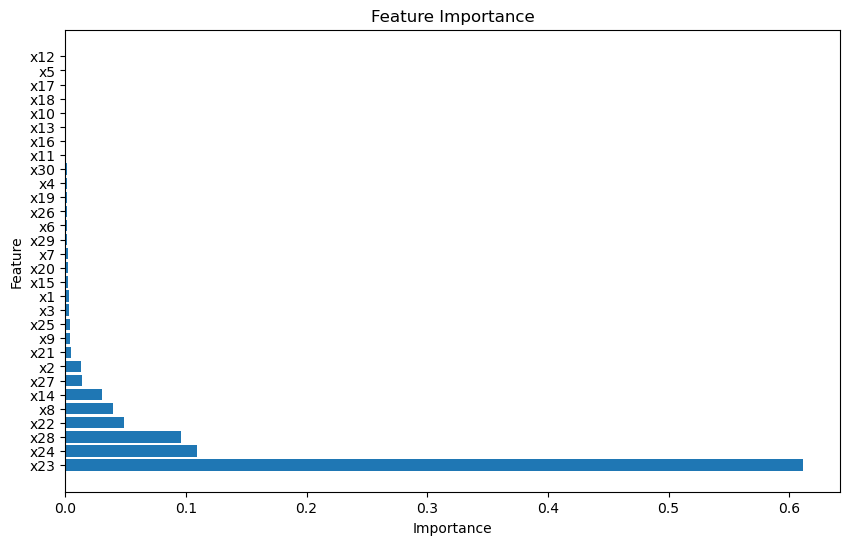

In [8]:
# Create a dataframe with feature names and importance values
df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the dataframe by importance values in descending order
df_importance = df_importance.sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()